# Geodatenanalyse 1


## Termin 5 - Block 1

## Datenvisualisierung in Python - Teil 1

In [1]:
import numpy as np
from matplotlib import pyplot as plt

## Übung 1

Bilde folgende zwei Funktionen im Interval $]0, 100]$ ab:
- $f(x) = \sqrt{x} - 4$
- $f(x) = log_e(x)$

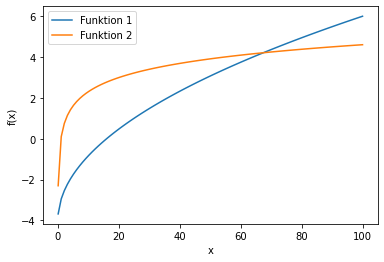

In [3]:
# Hier kannst du dein Programm erstellen
x = np.linspace(0.1, 100, 100)

y1 = np.sqrt(x) - 4
plt.plot(x, y1, label='Funktion 1')

y2 = np.log(x)
plt.plot(x, y2, label='Funktion 2')

plt.xlabel('x')
plt.ylabel('f(x)')

plt.legend()

## Übung 2

Bei dieser Übung geht es um das Erstellen einer einfachen Abbildung. Im Labor wurden Temperaturdaten gemessen, welche zur schnellen Auswertung visualisiert werden sollen.

- **Aufgabe 1**: Erstelle ein Liniendiagramm der Spalten "Observed T [K]" über die Zeit in Stunden mit beiden Datensätzen.
- **Aufgabe 2**: Fülle die Datenlücken mit linearer Interpolation und erstelle eine Abbildung, in der die interpolierten Datenlücken farbig sichtbar werden.

*Hinweis*: Bitte nicht die Achsenbeschriftungen vergessen!

Datendateien: 
- datasets/model_T8.csv
- datasets/model_T22.csv


Text(0, 0.5, 'T [K]')

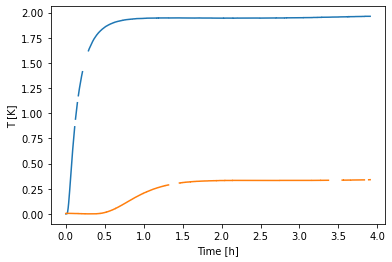

In [5]:
# Hier kannst du dein Programm erstellen

# Übung 2 / Aufgabe 1

data1 = np.genfromtxt("datasets/model_T8.csv", delimiter=",", skip_header=1)
data2 = np.genfromtxt("datasets/model_T22.csv", delimiter=",", skip_header=1)

time = data1[:, 0]/3600

plt.plot(time, data1[:, 2])
plt.plot(time, data2[:, 2])

plt.xlabel('Time [h]')
plt.ylabel('T [K]')

Text(0, 0.5, 'T [K]')

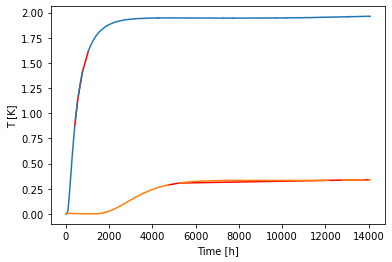

In [4]:
# Hier kannst du dein Programm erstellen

# Übung 2 / Aufgabe 2

# erster Datensatz
data1 = np.genfromtxt("datasets/model_T8.csv", delimiter=",", skip_header=1)

gapid = np.isnan(data1[:, 2])
gaps_filled1 = np.interp(data1[gapid, 0], data1[~gapid, 0], data1[~gapid, 2])

plt.plot(data1[gapid, 0], gaps_filled1, '-r')
plt.plot(data1[:, 0], data1[:, 2])

# zweiter Datensatz
data2 = np.genfromtxt(open("datasets/model_T22.csv", "rb"), delimiter=",", skip_header=1)

gapid = np.isnan(data2[:, 2])
gaps_filled2 = np.interp(data2[gapid, 0], data2[~gapid, 0], data2[~gapid, 2])

plt.plot(data2[gapid, 0], gaps_filled2, '-r')
plt.plot(data2[:, 0], data2[:, 2])

plt.xlabel('Time [h]')
plt.ylabel('T [K]')

## Übung 3

Im Datenverzeichnis ist eine Datei, welche hydraulische Spaltöffnungen enthält (*datasets/hydraulic_apertures.csv*) (Hale et. al., 2020). Diese wurden im Labor an derselben Probe aber mit zwei unterschiedlichen Verfahren gemessen (*Method A* und *Method B*).

Erstelle und speichere eine Box-Plot Abbildung, welche einen einfachen Einblick in die Statistik der Ergebnisse beider Verfahren gibt.

> Hale, S., Naab, C., Butscher, C. et al. Method Comparison to Determine Hydraulic Apertures of Natural Fractures. Rock Mech Rock Eng 53, 1467–1476 (2020). [https://doi.org/10.1007/s00603-019-01966-7](https://doi.org/10.1007/s00603-019-01966-7)

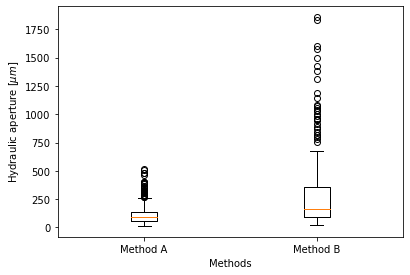

In [6]:
# Hier kannst du dein Programm erstellen

data = np.genfromtxt("datasets/hydraulic_apertures.csv", delimiter=",", skip_header=1)
# print(data)

data1 = data[~np.isnan(data[:, 0]), 0]
data2 = data[~np.isnan(data[:, 1]), 1]
boxdata = np.array([data1, data2], dtype=object)

pos = np.arange(1, 3)

fig = plt.figure()
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])

ax.boxplot(boxdata, positions=pos)

ax.set_xticklabels(['Method A', 'Method B'])
ax.set_xlabel('Methods')
ax.set_ylabel('Hydraulic aperture [$\mu m$]')

plt.savefig('Uebung-3.pdf')

## ENDE